# Práctica 3

# Dataset 2

# Limpieza de datos

Se propone hacer el EDA del dataset Tree Census in New York City. Un censo que describe la especie y características físicas y ubicación geTCráfica de los árboles ubicados en NYC. Consultado en: https://www.kaggle.com/nycparks/tree-census

## Data Exploration

Importamos los módulos necesarios.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

In [2]:
TC = pd.read_csv('new_york_tree_census_2015.csv')
TC.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,25,14,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,2015-08-19,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,34,13,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,2015-12-30,7,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,32,10,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,2016-07-05,10,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,46,22,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,2015-06-13,4,0,OnCurb,Alive,Good,Prunus virginiana,'Schubert' chokecherry,...,31,10,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017


In [3]:
# shape and data types of the data
print('El número de registros en el dataset es: '+ str(TC.shape[0]) + ' y el número de atributos es: ' + str(TC.shape[1])+'.')

El número de registros en el dataset es: 683788 y el número de atributos es: 41.


In [4]:
pd.DataFrame(TC.dtypes, columns=['Type'])

,Type
tree_id,int64
block_id,int64
created_at,object
tree_dbh,int64
stump_diam,int64
curb_loc,object
status,object
health,object
spc_latin,object
spc_common,object


Selección de columnas con variables numéricas

In [5]:
TC_numericas = TC.select_dtypes(include=[np.number])
cols_numericas = TC_numericas.columns.values
print(cols_numericas)

['tree_id' 'block_id' 'tree_dbh' 'stump_diam' 'zipcode' 'cb_num'
 'borocode' 'cncldist' 'st_assem' 'st_senate' 'boro_ct' 'latitude'
 'longitude' 'x_sp' 'y_sp']


Selección de columnas con variables categóricas

In [6]:
TC_no_numericas = TC.select_dtypes(exclude=[np.number])
cols_no_numericas = TC_no_numericas.columns.values
print(cols_no_numericas)

['created_at' 'curb_loc' 'status' 'health' 'spc_latin' 'spc_common'
 'steward' 'guards' 'sidewalk' 'user_type' 'problems' 'root_stone'
 'root_grate' 'root_other' 'trunk_wire' 'trnk_light' 'trnk_other'
 'brch_light' 'brch_shoe' 'brch_other' 'address' 'zip_city' 'boroname'
 'nta' 'nta_name' 'state']


## Datos faltantes

### Técnica #1: mapa de calor de los datos faltantes

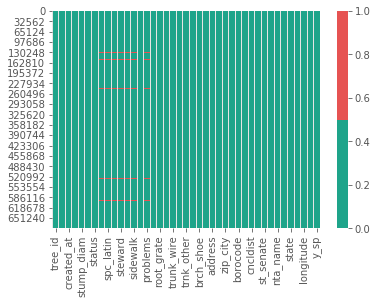

In [7]:
columnas = TC.columns
colores = ['#1EA48A', '#E65352'] #Red is missing. Blue is not missing.
sns.heatmap(TC[columnas].isnull(), cmap=sns.color_palette(colores))

Observación: Podemos observar que, casi en su mayoría, tenemos un dataset casi completo con excepción de algunos valores faltantes en los atributos de health, spc_latin, spc_common, steward, guards, sidewalk y problems. 

### Técnica #2: Lista de porcentaje de datos faltantes

In [8]:
columnas_missing=[]
porcentaje_missing=[]
for col in columnas:
    porcentaje_missing_values = np.mean(TC[col].isnull())
    if (porcentaje_missing_values > 0):
        columnas_missing.append(col)
        porcentaje_missing.append(str(round(porcentaje_missing_values*100))+'%')
        
TC_faltantes = pd.DataFrame(data=np.c_[columnas_missing, porcentaje_missing], columns=['Atributo', 'Porcentaje valores faltantes'])
TC_faltantes

,Atributo,Porcentaje valores faltantes
0,health,5.0%
1,spc_latin,5.0%
2,spc_common,5.0%
3,steward,5.0%
4,guards,5.0%
5,sidewalk,5.0%
6,problems,5.0%


### Técnica #3: Histograma de datos faltantes

Indicador faltante creado para: health
Indicador faltante creado para: spc_latin
Indicador faltante creado para: spc_common
Indicador faltante creado para: steward
Indicador faltante creado para: guards
Indicador faltante creado para: sidewalk
Indicador faltante creado para: problems


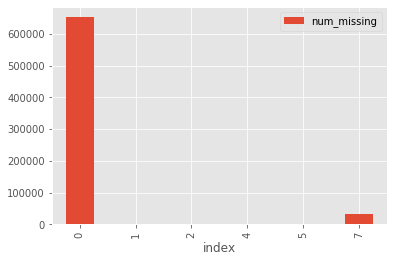

In [9]:
# first create missing indicator for features with missing data
for col in TC.columns:
    #Crea un arreglo con T/F donde T es que hay un nulo, después lo suma.
    missing = TC[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Indicador faltante creado para: {}'.format(col))
        TC['{}_tiene_faltantes'.format(col)] = missing
        
# Basado en el indicador anterior, se crea la gráfica 
ismissing_cols = [col for col in TC.columns if 'tiene_faltantes' in col]
TC['num_missing'] = TC[ismissing_cols].sum(axis=1)

TC['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
plt.show()

## Técnicas para tratar con los valores atípicos

### Técnica #1: Histograma y Box Plot

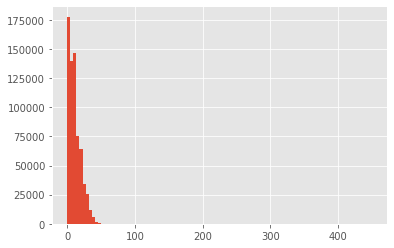

In [10]:
TC['tree_dbh'].hist(bins=100)
plt.show()

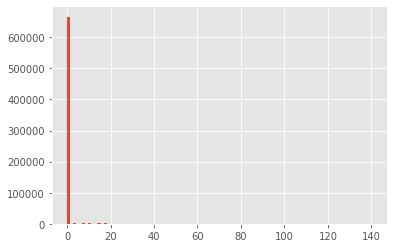

In [11]:
TC['stump_diam'].hist(bins=100)
plt.show()

En la figura siguiente se puede ver que los datos parecen muy sesgados con la posible existencia de valores atípicos. Para analizar la característica más de cerca, se usan los box plot.

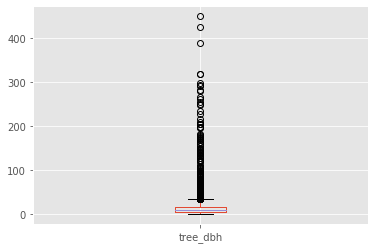

In [12]:
TC.boxplot(column=['tree_dbh'])
plt.show()

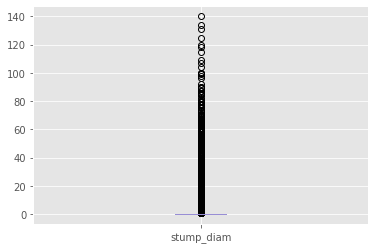

In [13]:
TC.boxplot(column=['stump_diam'])
plt.show()

Podemos observar que hay observaciones que toman valores en tree_dbh mayoes a los que hay antes del cuantil 75%, es decir que se alejan demasiado de donde se concetra la mayoría de la información, es por eso que en el histograma como en el boxplot podemos visualizar como tenemos una distribución cargada hacia la izquierda y una gráfica con muchos valores atípicos.

### Técnica #2: Estadística descriptiva

In [14]:
TC['tree_dbh'].describe()

count    683788.000000
mean         11.279787
std           8.723042
min           0.000000
25%           4.000000
50%           9.000000
75%          16.000000
max         450.000000
Name: tree_dbh, dtype: float64

El dato que se posiciona en el cuartil 75% es de 16, mientras que el máximo es de 450. 

In [15]:
TC['stump_diam'].describe()

count    683788.000000
mean          0.432463
std           3.290241
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         140.000000
Name: stump_diam, dtype: float64

El dato que se posiciona en el cuartil 75% es de 0, mientras que el máximo es de 140.

### Técnica #3: Gráfico de barras

Este es el ejemplo de una variable categórica.

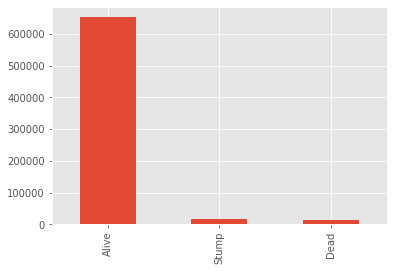

In [16]:
TC['status'].value_counts().plot.bar()
plt.show()

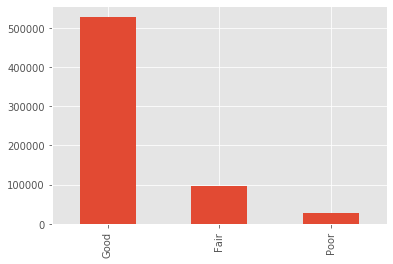

In [17]:
TC['health'].value_counts().plot.bar()
plt.show()

## ¿Qué hacer con los valores atípicos?


Aunque los valores atípicos no son difíciles de detectar, tenemos que determinar las soluciones adecuadas para manejarlos. Depende en gran medida del conjunto de datos y del objetivo del proyecto. Los métodos para manejar los valores atípicos son algo similar a los datos que faltan. O bien los eliminamos, los ajustamos o los conservamos.

## Datos innecesarios

Todos los datos que se introduzcan en el modelo deberían servir para el propósito del proyecto. Los datos innecesarios son cuando los datos no añaden valor. Cubrimos tres tipos principales de datos innecesarios debido a diferentes razones.

### Tipo innecesario #1: Desinformativo / Repetitivo

A veces una característica no es informativa porque tiene demasiadas observaciones que tienen el mismo valor

In [18]:
num_filas = len(TC.index)
low_information_cols = [] #

for col in TC.columns:
    cnts = TC[col].value_counts(dropna=False)
    top_pct = (cnts/num_filas).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

stump_diam: 97.41821%
0      666134
4         966
5         939
3         779
6         754
12        717
10        716
14        660
8         660
15        648
7         612
13        609
20        572
18        567
16        557
9         530
17        526
11        525
22        426
19        410
24        404
25        398
2         363
21        349
30        338
23        330
28        308
26        273
27        272
32        204
        ...  
56          4
66          3
76          3
64          3
79          3
90          2
89          2
87          2
84          2
100         2
74          2
71          2
69          2
125         1
120         1
104         1
118         1
115         1
109         1
107         1
131         1
134         1
99          1
98          1
96          1
92          1
86          1
82          1
72          1
140         1
Name: stump_diam, Length: 100, dtype: int64

curb_loc: 96.06720%
OnCurb            656896
OffsetFromCurb     26892
Name: cur

¿Qué hacer?
Necesitamos entender las razones detrás de la característica repetitiva. Cuando son genuinamente desinformativas, podemos descartarlas. En este aso, todas nos aportan información.

### Tipo innecesario #2: Irrelevante

Una vez más, los datos deben proporcionar información valiosa para el proyecto. Si las características no están relacionadas con la cuestión que estamos tratando de resolver en el proyecto, son irrelevantes.

¿Cómo averiguarlo?
Necesitamos hojear las características para identificar las irrelevantes. Por ejemplo, un rasgo que registra la temperatura en Toronto no proporciona ninguna información útil para predecir los precios de las viviendas en Rusia.

¿Qué hacer?
Cuando las características no sirven al objetivo del proyecto, podemos eliminarlas.

feature selection

## Tipo innecesario #3: Duplicados

Los datos duplicados son cuando existen copias de la misma observación. Hay dos tipos principales de datos duplicados.

## Duplicados tipo #1: todas las características

¿Cómo averiguarlo? 

Este duplicado ocurre cuando todos los valores de las características dentro de las observaciones son los mismos. Es fácil de encontrar. Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado TC_dedupped eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (TC y TC_dedupped) para averiguar el número de filas duplicadas.

In [19]:
TC_dedupped = TC.drop('tree_id', axis=1).drop_duplicates()

# there were duplicate rows
print(TC.shape)
print(TC_dedupped.shape)

(683788, 49)
(683699, 48)


## Duplicados tipo #2: características claves

¿Cómo averiguarlo?
A veces es mejor eliminar los datos duplicados basándose en un conjunto de identificadores únicos. Podemos establecer un grupo de características críticas como identificadores únicos para las transacciones. Incluimos tree_id, block_id, created_at, latitude, longitude. Comprobamos si hay duplicados basados en ellos.

In [20]:
key = ['tree_id', 'block_id', 'created_at', 'latitude', 'longitude']
TC.fillna(-999).groupby(key)['tree_id'].count().sort_values(ascending=False).head(20)

tree_id  block_id  created_at  latitude   longitude 
722694   999999    2016-10-05  40.642404  -73.889086    1
246539   414410    2015-09-22  40.555112  -74.146283    1
246537   414410    2015-09-22  40.554797  -74.146179    1
246536   335034    2015-09-22  40.727327  -73.730773    1
246535   335034    2015-09-22  40.727429  -73.730734    1
246534   335034    2015-09-22  40.727480  -73.730715    1
246533   335034    2015-09-22  40.727549  -73.730689    1
246532   335034    2015-09-22  40.727616  -73.730663    1
246531   335034    2015-09-22  40.727758  -73.730609    1
246530   335034    2015-09-22  40.727831  -73.730581    1
246529   335034    2015-09-22  40.727990  -73.730521    1
246528   335034    2015-09-22  40.728079  -73.730487    1
246527   335034    2015-09-22  40.728152  -73.730459    1
246526   335034    2015-09-22  40.728324  -73.730394    1
246525   335034    2015-09-22  40.728402  -73.730364    1
246524   335034    2015-09-22  40.728469  -73.730338    1
246523   335034    

¿Qué hacer?
Podemos eliminar estos duplicados basándonos en las características principales.

In [22]:
# drop duplicates based on an subset of variables.

key = ['tree_id', 'block_id', 'created_at', 'latitude', 'longitude']
TC_dedupped2 = TC.drop_duplicates(subset=key)

print(TC.shape)
print(TC_dedupped2.shape)

(683788, 49)
(683788, 49)


En este dataset no tenemos datos duplicados.

## Datos inconsistentes

También es crucial que el conjunto de datos siga estándares específicos para ajustarse a un modelo. Necesitamos explorar los datos de diferentes maneras para encontrar los datos inconsistentes. La mayor parte del tiempo, depende de las observaciones y la experiencia. No hay un código establecido para ejecutarlo y arreglarlo todo. A continuación cubrimos cuatro tipos de datos inconsistentes.

Tipo inconsistente #1: Capitalización
El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas.

¿Cómo averiguarlo?

Veamos la característica spc_common

In [23]:
TC['spc_common'].value_counts(dropna=False)

London planetree          87014
honeylocust               64264
Callery pear              58931
pin oak                   53185
Norway maple              34189
NaN                       31619
littleleaf linden         29742
cherry                    29279
Japanese zelkova          29258
ginkgo                    21024
Sophora                   19338
red maple                 17246
green ash                 16251
American linden           13530
silver maple              12277
sweetgum                  10657
northern red oak           8400
silver linden              7995
American elm               7975
maple                      7080
purple-leaf plum           6879
swamp white oak            6598
crimson king maple         5923
Chinese elm                5345
'Schubert' chokecherry     4888
Japanese tree lilac        4568
eastern redbud             3801
golden raintree            3719
crab apple                 3527
Kentucky coffeetree        3364
                          ...  
mimosa  

¿Qué hacer?
Para evitarlo, podemos poner todas las letras en minúsculas (o mayúsculas).

In [24]:
# make everything lower case.
TC['sub_spc_common_lower'] = TC['spc_common'].str.lower()
TC['sub_spc_common_lower'].value_counts(dropna=False)

london planetree          87014
honeylocust               64264
callery pear              58931
pin oak                   53185
norway maple              34189
NaN                       31619
littleleaf linden         29742
cherry                    29279
japanese zelkova          29258
ginkgo                    21024
sophora                   19338
red maple                 17246
green ash                 16251
american linden           13530
silver maple              12277
sweetgum                  10657
northern red oak           8400
silver linden              7995
american elm               7975
maple                      7080
purple-leaf plum           6879
swamp white oak            6598
crimson king maple         5923
chinese elm                5345
'schubert' chokecherry     4888
japanese tree lilac        4568
eastern redbud             3801
golden raintree            3719
crab apple                 3527
kentucky coffeetree        3364
                          ...  
mimosa  

## Tipo inconsistente #2: Formatos

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica timestamp al formato DateTime.

In [27]:
TC.created_at.value_counts()

2015-10-27    6852
2015-10-13    6676
2015-10-26    6258
2015-10-29    6223
2015-10-15    6085
2015-11-03    6028
2015-10-14    6010
2015-10-30    5834
2015-10-20    5677
2015-10-22    5368
2015-11-02    5322
2015-10-16    5151
2015-10-23    5069
2015-11-04    5065
2015-10-07    5027
2015-10-10    4919
2015-11-05    4780
2015-10-21    4542
2015-09-25    4362
2015-10-19    4319
2015-10-28    4316
2015-11-18    4248
2015-10-12    4219
2015-09-23    4169
2015-10-08    4164
2015-11-11    4074
2015-10-06    3987
2015-11-17    3956
2015-11-06    3869
2015-11-19    3810
              ... 
2016-04-07      40
2016-01-28      38
2016-03-27      37
2016-02-11      37
2016-03-30      35
2016-09-29      34
2016-04-01      32
2016-04-12      32
2016-02-28      31
2016-03-12      31
2016-05-01      30
2016-01-19      29
2016-04-10      29
2016-03-24      26
2016-01-09      24
2016-04-09      21
2016-02-18      20
2016-03-08      19
2016-04-26      17
2016-01-26      16
2016-02-16      13
2016-03-19  

### ¿Cómo averiguarlo?

La característica timestamp está en formato objeto siendo que representa fechas.

In [28]:
TC.created_at.describe()

count         683788
unique           483
top       2015-10-27
freq            6852
Name: created_at, dtype: object

### ¿Qué hacer?

Podemos convertirlo y extraer los valores de fecha u hora usando el código que se muestra a continuación. Después de esto, es más fácil analizar el grupo de volumen de transacciones por año o mes.

In [29]:
TC['timestamp_dt'] = pd.to_datetime(TC['created_at'], format='%Y-%m-%d')
TC['year'] = TC['timestamp_dt'].dt.year
TC['month'] = TC['timestamp_dt'].dt.month
TC['weekday'] = TC['timestamp_dt'].dt.weekday

print(TC['year'].value_counts(dropna=False))
print()
print(TC['month'].value_counts(dropna=False))

2015    509525
2016    174263
Name: year, dtype: int64

10    130540
8     121704
9     106028
7      95107
11     76089
6      70790
12     49842
5      21213
3       3651
2       3147
4       3003
1       2674
Name: month, dtype: int64


## Tipo inconsistente #3: Valores categóricos

Una característica categórica tiene un número limitado de valores (símbolos). A veces puede haber otros valores debido a razones como los errores ortográficos.

¿Cómo averiguarlo?

Necesitamos observar la característica para descubrir esta inconsistencia. Mostrémoslo con un ejemplo. Creamos un nuevo conjunto de datos a continuación.  Una forma sencilla de identificarlos es la distancia edit. Mide cuántas letras (distancia) necesitamos para cambiar la ortografía de un valor para que coincida con otro valor.

In [44]:
from nltk.metrics import edit_distance

TC_nta_name_ex = pd.DataFrame(data={'nta_name': ['Jackson Heights', 'jackson heights', 'jackson heights ', ' jackson heights', 'Bay Ridge', 'bay ridge', 'bay ridge ', ' bay ridge']})

TC_nta_name_ex['nta_name_distance_Jackson_Heights'] = TC_nta_name_ex['nta_name'].map(lambda x: edit_distance(x, 'Jackson Heights'))
TC_nta_name_ex['nta_name_distance_Bay_Ridge'] = TC_nta_name_ex['nta_name'].map(lambda x: edit_distance(x, 'Bay Ridge'))
TC_nta_name_ex

,nta_name,nta_name_distance_Jackson_Heights,nta_name_distance_Bay_Ridge
0,Jackson Heights,0,12
1,jackson heights,2,12
2,jackson heights,3,13
3,jackson heights,3,13
4,Bay Ridge,12,0
5,bay ridge,12,2
6,bay ridge,12,3
7,bay ridge,13,3


¿Qué hacer?
Podemos establecer criterios para convertir estos errores tipográficos a los valores correctos. Por ejemplo, el siguiente código establece que todos los valores dentro de una distancia de 2 letras de "Basketball" sean "Basketball" y "Judo" sean "Judo".

In [47]:
msk = TC_nta_name_ex['nta_name_distance_Jackson_Heights'] <= 2
TC_nta_name_ex.loc[msk, 'nta_name'] = 'Jackson Heights'

msk = TC_nta_name_ex['nta_name_distance_Bay_Ridge'] <= 2
TC_nta_name_ex.loc[msk, 'nta_name'] = 'Bay Ridge'

TC_nta_name_ex

,nta_name,nta_name_distance_Jackson_Heights,nta_name_distance_Bay_Ridge
0,Jackson Heights,0,12
1,Jackson Heights,2,12
2,jackson heights,3,13
3,jackson heights,3,13
4,Bay Ridge,12,0
5,Bay Ridge,12,2
6,bay ridge,12,3
7,bay ridge,13,3


## Tipo inconsistente #4: Direcciones
La característica de la dirección podría ser un dolor de cabeza para muchos de nosotros. Porque la gente que introduce los datos en la base de datos a menudo no sigue un formato estándar.

### ¿Qué hacer?

Ejecutamos el siguiente código para poner las letras en minúsculas, eliminar los espacios en blanco, eliminar los puntos y estandarizar las palabras.

In [40]:
# no address column in the housing dataset. So create one to show the code.
TC_add_ex = TC[['address']]
TC_add_ex

,address
0,76-046 164 STREET
1,72-020 32 AVENUE
2,153-026 119 AVENUE
3,89 89 STREET
4,559 BEACH 68 STREET
5,3554 BROADWAY
6,2030 PITKIN AVENUE
7,5008 FT HAMILTON PARKWAY
8,85-006 WOODHAVEN BOULEVARD
9,1340 EAST BAY AVENUE


In [42]:
TC_add_ex['address_std'] = TC_add_ex['address'].str.lower()
TC_add_ex['address_std'] = TC_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
TC_add_ex['address_std'] = TC_add_ex['address_std'].str.replace('\\.', '') # remove period.
TC_add_ex['address_std'] = TC_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
TC_add_ex['address_std'] = TC_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
TC_add_ex['address_std'] = TC_add_ex['address_std'].str.replace('\\bavenue\\b', 'ave') # replace avenue with ave.

TC_add_ex

,address,address_std
0,76-046 164 STREET,76-046 164 st
1,72-020 32 AVENUE,72-020 32 ave
2,153-026 119 AVENUE,153-026 119 ave
3,89 89 STREET,89 89 st
4,559 BEACH 68 STREET,559 beach 68 st
5,3554 BROADWAY,3554 broadway
6,2030 PITKIN AVENUE,2030 pitkin ave
7,5008 FT HAMILTON PARKWAY,5008 ft hamilton parkway
8,85-006 WOODHAVEN BOULEVARD,85-006 woodhaven boulevard
9,1340 EAST BAY AVENUE,1340 east bay ave
